<a href="https://colab.research.google.com/github/cjonesy20/BrainChip-Akida-Colab/blob/main/plot_5_voc_yolo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://doc.brainchipinc.com/_downloads/0792bc3dc7b01941f86b4f993c20ab5f/requirements.txt
!pip install -r requirements.txt

--2023-08-01 17:09:44--  https://doc.brainchipinc.com/_downloads/0792bc3dc7b01941f86b4f993c20ab5f/requirements.txt
Resolving doc.brainchipinc.com (doc.brainchipinc.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to doc.brainchipinc.com (doc.brainchipinc.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     223  --.-KB/s    in 0s      

2023-08-01 17:09:44 (3.95 MB/s) - ‘requirements.txt’ saved [223/223]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.5/682.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%matplotlib notebook


# YOLO/PASCAL-VOC detection tutorial

This tutorial demonstrates that Akida can perform object detection using a
state-of-the-art model architecture. This is illustrated using a subset of the
[PASCAL-VOC 2007 dataset](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/htmldoc/index.html)_
with "car" and "person" classes only. The YOLOv2 architecture from
[Redmon et al (2016)](https://arxiv.org/pdf/1506.02640.pdf) has been chosen to
tackle this object detection problem.


## 1. Introduction



### 1.1 Object detection

Object detection is a computer vision task that combines two elemental tasks:

 - object classification that consists in assigning a class label to an image
   like shown in the [AkidaNet/ImageNet inference](plot_1_akidanet_imagenet.html)
   example
 - object localization that consists in drawing a bounding box around one or
   several objects in an image

One can learn more about the subject reading this [introduction to object
detection blog article](https://machinelearningmastery.com/object-recognition-with-deep-learning/).




### 1.2 YOLO key concepts

You Only Look Once (YOLO) is a deep neural network architecture dedicated to
object detection.

As opposed to classic networks that handle object detection, YOLO predicts
bounding boxes (localization task) and class probabilities (classification
task) from a single neural network in a single evaluation. The object
detection task is reduced to a regression problem to spatially separated boxes
and associated class probabilities.

YOLO base concept is to divide an input image into regions, forming a grid,
and to predict bounding boxes and probabilities for each region. The bounding
boxes are weighted by the prediction probabilities.

YOLO also uses the concept of "anchors boxes" or "prior boxes". The network
does not actually predict the actual bounding boxes but offsets from anchors
boxes which are templates (width/height ratio) computed by clustering the
dimensions of the ground truth boxes from the training dataset. The anchors
then represent the average shape and size of the objects to detect. More
details on the anchors boxes concept are given in [this blog article](https://medium.com/@andersasac/anchor-boxes-the-key-to-quality-object-detection-ddf9d612d4f9).

Additional information about YOLO can be found on the [Darknet website](https://pjreddie.com/darknet/yolov2/) and source code for the preprocessing
and postprocessing functions that are included in akida_models package (see
the [processing section](../../api_reference/akida_models_apis.html#processing)
in the model zoo) is largely inspired from
[experiencor github](https://github.com/experiencor/keras-yolo2).




## 2. Preprocessing tools

As this example focuses on car and person detection only, a subset of VOC has
been prepared with test images from VOC2007 that contains at least one
of the occurence of the two classes. Just like the VOC dataset, the subset
contains an image folder, an annotation folder and a text file listing the
file names of interest.

The [YOLO toolkit](../../api_reference/akida_models_apis.html#yolo-toolkit)
offers several methods to prepare data for processing, see
[load_image](../../api_reference/akida_models_apis.html#akida_models.detection.processing.load_image),
[preprocess_image](../../api_reference/akida_models_apis.html#akida_models.detection.processing.preprocess_image)
or [parse_voc_annotations](../../api_reference/akida_models_apis.html#akida_models.detection.processing.parse_voc_annotations).





In [ ]:
import os

from tensorflow.keras.utils import get_file
from akida_models.detection.processing import parse_voc_annotations

# Download validation set from Brainchip data server
data_path = get_file(
    "voc_test_car_person.tar.gz",
    "http://data.brainchip.com/dataset-mirror/voc/voc_test_car_person.tar.gz",
    cache_subdir='datasets/voc',
    extract=True)

data_dir = os.path.dirname(data_path)
gt_folder = os.path.join(data_dir, 'voc_test_car_person', 'Annotations')
image_folder = os.path.join(data_dir, 'voc_test_car_person', 'JPEGImages')
file_path = os.path.join(
    data_dir, 'voc_test_car_person', 'test_car_person.txt')
labels = ['car', 'person']

val_data = parse_voc_annotations(gt_folder, image_folder, file_path, labels)
print("Loaded VOC2007 test data for car and person classes: "
      f"{len(val_data)} images.")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

221551911/221551911 [==============================] - 10s 0us/step
Loaded VOC2007 test data for car and person classes: 2500 images.


Anchors can also be computed easily using YOLO toolkit.

.. Note:: The following code is given as an example. In a real use case
          scenario, anchors are computed on the training dataset.



In [ ]:
from akida_models.detection.generate_anchors import generate_anchors

num_anchors = 5
grid_size = (7, 7)
anchors_example = generate_anchors(val_data, num_anchors, grid_size)


Average IOU for 5 anchors: 0.61
Anchors:  [[0.63263, 1.13864], [1.29467, 2.90717], [2.26527, 2.97757], [3.80627, 5.03516], [5.21984, 5.79988]]


## 3. Model architecture

The [model zoo](../../api_reference/akida_models_apis.html#yolo) contains a
YOLO model that is built upon the [AkidaNet architecture](../../api_reference/akida_models_apis.html#akida_models.akidanet_imagenet)
and 3 separable convolutional layers at the top for bounding box and class
estimation followed by a final separable convolutional which is the detection
layer. Note that for efficiency, the alpha parameter in AkidaNet (network
width or number of filter in each layer) is set to 0.5.




In [ ]:
from akida_models import yolo_base

# Create a yolo model for 2 classes with 5 anchors and grid size of 7
classes = 2

model = yolo_base(input_shape=(224, 224, 3),
                  classes=classes,
                  nb_box=num_anchors,
                  alpha=0.5)
model.summary()

Model: "yolo_base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv_0 (Conv2D)             (None, 112, 112, 16)      432       
                                                                 
 conv_0/BN (BatchNormalizati  (None, 112, 112, 16)     64        
 on)                                                             
                                                                 
 conv_0/relu (ReLU)          (None, 112, 112, 16)      0         
                                                                 
 conv_1 (Conv2D)             (None, 112, 112, 32)      4608      
                                                         

The model output can be reshaped to a more natural shape of:

 (grid_height, grid_width, anchors_box, 4 + 1 + num_classes)

where the "4 + 1" term represents the coordinates of the estimated bounding
boxes (top left x, top left y, width and height) and a confidence score. In
other words, the output channels are actually grouped by anchor boxes, and in
each group one channel provides either a coordinate, a global confidence score
or a class confidence score. This process is done automatically in the
[decode_output](../../api_reference/akida_models_apis.html#akida_models.detection.processing.decode_output)_
function.



In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Reshape

# Define a reshape output to be added to the YOLO model
output = Reshape((grid_size[1], grid_size[0], num_anchors, 4 + 1 + classes),
                 name="YOLO_output")(model.output)

# Build the complete model
full_model = Model(model.input, output)
full_model.output

<KerasTensor: shape=(None, 7, 7, 5, 7) dtype=float32 (created by layer 'YOLO_output')>

## 4. Training

As the YOLO model relies on Brainchip AkidaNet/ImageNet network, it is
possible to perform transfer learning from ImageNet pretrained weights when
training a YOLO model. See the [PlantVillage transfer learning example](plot_4_transfer_learning.html) for a detail explanation on transfer
learning principles.

When using transfer learning for YOLO training, we advise to proceed in
several steps that include model calibration:

* instantiate the `yolo_base` model and load AkidaNet/ImageNet pretrained
  float weights,

```bash
akida_models create -s yolo_akidanet_voc.h5 yolo_base --classes 2 \
         --base_weights akidanet_imagenet_224_alpha_50.h5
```
* freeze the AkidaNet layers and perform training,

```bash
yolo_train train -d voc_preprocessed.pkl -m yolo_akidanet_voc.h5 \
    -ap voc_anchors.pkl -e 25 -fb 1conv -s yolo_akidanet_voc.h5
```
* quantize the network, create data for calibration and calibrate,

```bash
cnn2snn quantize -m yolo_akidanet_voc.h5 -iq 8 -wq 4 -aq 4
yolo_train extract -d voc_preprocessed.pkl -ap voc_anchors.pkl -b 1024 -o voc_samples.npz \
    -m yolo_akidanet_voc_iq8_wq4_aq4.h5
cnn2snn calibrate adaround -sa voc_samples.npz -b 128 -e 500 -lr 1e-3 \
    -m yolo_akidanet_voc_iq8_wq4_aq4.h5
```
* tune the model to recover accuracy.

```bash
yolo_train tune -d voc_preprocessed.pkl \
    -m yolo_akidanet_voc_iq8_wq4_aq4_adaround_calibrated.h5 -ap voc_anchors.pkl \
    -e 10 -s yolo_akidanet_voc_iq8_wq4_aq4.h5
```
.. Note::

      - ``voc_anchors.pkl`` is obtained saving the output of the
        `generate_anchors` call to a pickle file,
      - ``voc_preprocessed.pkl`` is obtained saving training data, validation
        data (obtained using `parse_voc_annotations`) and labels list (i.e
        ["car", "person"]) into a pickle file.


Even if transfer learning should be the preferred way to train a YOLO model, it
has been observed that for some datasets training all layers from scratch
gives better results. That is the case for our [YOLO WiderFace model](../../api_reference/akida_models_apis.html#akida_models.yolo_widerface_pretrained)
to detect faces. In such a case, the training pipeline to follow is described
in the [typical training scenario](../../user_guide/cnn2snn.html#typical-training-scenario).




## 5. Performance

The model zoo also contains an [helper method](../../api_reference/akida_models_apis.html#akida_models.yolo_voc_pretrained)
that allows to create a YOLO model for VOC and load pretrained weights for the
car and person detection task and the corresponding anchors. The anchors are
used to interpret the model outputs.

The metric used to evaluate YOLO is the mean average precision (mAP) which is
the percentage of correct prediction and is given for an intersection over
union (IoU) ratio. Scores in this example are given for the standard IoU of
0.5 meaning that a detection is considered valid if the intersection over
union ratio with its ground truth equivalent is above 0.5.

 .. Note:: A call to [evaluate_map](../../api_reference/akida_models_apis.html#akida_models.detection.map_evaluation.MapEvaluation.evaluate_map)
           will preprocess the images, make the call to ``Model.predict`` and
           use [decode_output](../../api_reference/akida_models_apis.html#akida_models.detection.processing.decode_output)_
           before computing precision for all classes.

Reported performanced for all training steps are as follows:

+------------+-----------+------------------+-------------+
|            |   Float   | 8/4/4 Calibrated | 8/4/4 Tuned |
+============+===========+==================+=============+
| Global mAP |  38.38 %  | 32.88 %          | 38.83 %     |
+------------+-----------+------------------+-------------+



In [ ]:
from timeit import default_timer as timer
from akida_models import yolo_voc_pretrained
from akida_models.detection.map_evaluation import MapEvaluation

# Load the pretrained model along with anchors
model_keras, anchors = yolo_voc_pretrained()

# Define the final reshape and build the model
output = Reshape((grid_size[1], grid_size[0], num_anchors, 4 + 1 + classes),
                 name="YOLO_output")(model_keras.output)
model_keras = Model(model_keras.input, output)

# Create the mAP evaluator object
num_images = 100

map_evaluator = MapEvaluation(model_keras, val_data[:num_images], labels,
                              anchors)

# Compute the scores for all validation images
start = timer()
mAP, average_precisions = map_evaluator.evaluate_map()
end = timer()

for label, average_precision in average_precisions.items():
    print(labels[label], '{:.4f}'.format(average_precision))
print('mAP: {:.4f}'.format(mAP))
print(f'Keras inference on {num_images} images took {end-start:.2f} s.\n')

14326960/14326960 [==============================] - 1s 0us/step


1/1 [==============================] - 0s 46ms/step
car 0.3844
person 0.3484
mAP: 0.3664
Keras inference on 100 images took 18.21 s.



## 6. Conversion to Akida



### 6.1 Convert to Akida model

Check model compatibility before akida conversion




In [ ]:
from cnn2snn import check_model_compatibility

compat = check_model_compatibility(model_keras, False)

The Keras quantized model is not compatible for a conversion to an Akida model:
 The Reshape layer YOLO_output can only be used to transform a tensor of shape (N,) to a tensor of shape (1, 1, N), and vice-versa. Receives input_shape (7, 7, 35) and output_shape (7, 7, 5, 7).


The last YOLO_output layer that was added for splitting channels into values
for each box must be removed before akida conversion.



In [ ]:
# Rebuild a model without the last layer
compatible_model = Model(model_keras.input, model_keras.layers[-2].output)

When converting to an Akida model, we just need to pass the Keras model
and the input scaling that was used during training to [cnn2snn.convert](../../api_reference/cnn2snn_apis.html#convert). In YOLO
[preprocess_image](../../api_reference/akida_models_apis.html#akida_models.detection.processing.preprocess_image)
function, images are zero centered and normalized between [-1, 1] hence the
scaling values.




In [ ]:
from cnn2snn import convert

model_akida = convert(compatible_model)
model_akida.summary()

                 Model Summary                  
________________________________________________
Input shape    Output shape  Sequences  Layers
[224, 224, 3]  [7, 7, 35]    1          18    
________________________________________________

_________________________________________________________________
Layer (type)                 Output shape    Kernel shape      

============== SW/conv_0-detection_layer (Software) =============

conv_0 (InputConv.)          [112, 112, 16]  (3, 3, 3, 16)     
_________________________________________________________________
conv_1 (Conv.)               [112, 112, 32]  (3, 3, 16, 32)    
_________________________________________________________________
conv_2 (Conv.)               [56, 56, 64]    (3, 3, 32, 64)    
_________________________________________________________________
conv_3 (Conv.)               [56, 56, 64]    (3, 3, 64, 64)    
_________________________________________________________________
separable_4 (Sep.Conv.)      [28, 28, 12

### 6.1 Check performance

Akida model accuracy is tested on the first *n* images of the validation set.

The table below summarizes the expected results:

+---------+-----------+-----------+
| #Images | Keras mAP | Akida mAP |
+=========+===========+===========+
| 100     |  38.80 %  |  34.26 %  |
+---------+-----------+-----------+
| 1000    |  40.11 %  |  39.35 %  |
+---------+-----------+-----------+
| 2500    |  38.83 %  |  38.85 %  |
+---------+-----------+-----------+




In [ ]:
# Create the mAP evaluator object
map_evaluator_ak = MapEvaluation(model_akida,
                                 val_data[:num_images],
                                 labels,
                                 anchors,
                                 is_keras_model=False)

# Compute the scores for all validation images
start = timer()
mAP_ak, average_precisions_ak = map_evaluator_ak.evaluate_map()
end = timer()

for label, average_precision in average_precisions_ak.items():
    print(labels[label], '{:.4f}'.format(average_precision))
print('mAP: {:.4f}'.format(mAP_ak))
print(f'Akida inference on {num_images} images took {end-start:.2f} s.\n')

car 0.4258
person 0.3430
mAP: 0.3844
Akida inference on 100 images took 26.59 s.



### 6.2 Show predictions for a random image




In [ ]:
%matplotlib inline

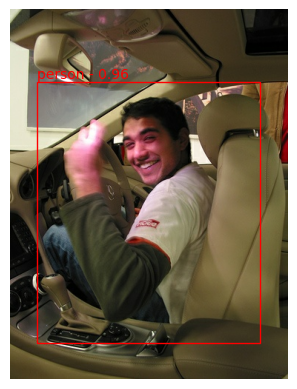

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from akida_models.detection.processing import load_image, preprocess_image, decode_output

# Take a random test image
i = np.random.randint(len(val_data))

input_shape = model_akida.layers[0].input_dims

# Load the image
raw_image = load_image(val_data[i]['image_path'])

# Keep the original image size for later bounding boxes rescaling
raw_height, raw_width, _ = raw_image.shape

# Pre-process the image
image = preprocess_image(raw_image, input_shape)
input_image = image[np.newaxis, :].astype(np.uint8)

# Call evaluate on the image
pots = model_akida.predict(input_image)[0]

# Reshape the potentials to prepare for decoding
h, w, c = pots.shape
pots = pots.reshape((h, w, len(anchors), 4 + 1 + len(labels)))

# Decode potentials into bounding boxes
raw_boxes = decode_output(pots, anchors, len(labels))

# Rescale boxes to the original image size
pred_boxes = np.array([[
    box.x1 * raw_width, box.y1 * raw_height, box.x2 * raw_width,
    box.y2 * raw_height,
    box.get_label(),
    box.get_score()
] for box in raw_boxes])

fig = plt.figure(num='VOC2012 car and person detection by Akida runtime')
ax = fig.subplots(1)
img_plot = ax.imshow(np.zeros(raw_image.shape, dtype=np.uint8))
img_plot.set_data(raw_image)

for box in pred_boxes:
    rect = patches.Rectangle((box[0], box[1]),
                             box[2] - box[0],
                             box[3] - box[1],
                             linewidth=1,
                             edgecolor='r',
                             facecolor='none')
    ax.add_patch(rect)
    class_score = ax.text(box[0],
                          box[1] - 5,
                          f"{labels[int(box[4])]} - {box[5]:.2f}",
                          color='red')

plt.axis('off')
plt.show()